In [720]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.svm import SVR

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from mlxtend.plotting import plot_confusion_matrix
from keras import callbacks

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal


In [721]:
## load the data
df = pd.read_csv("flights.csv")
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [723]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


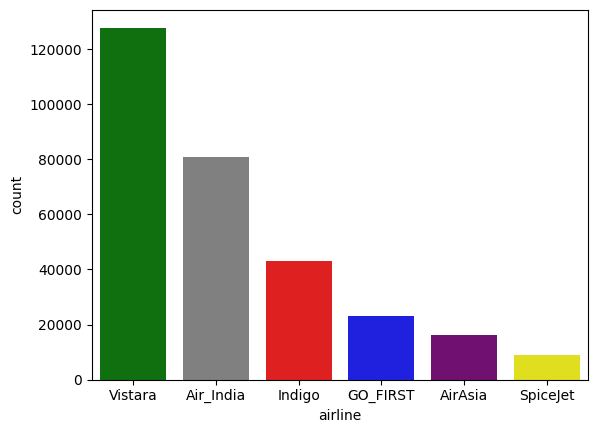

In [724]:
# Get the frequencies of each category in the "airline" column
freqs = df["airline"].value_counts()

# Get the category names in descending order of their frequency
order = freqs.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["airline"], order=order, palette=cols)
print(freqs)

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


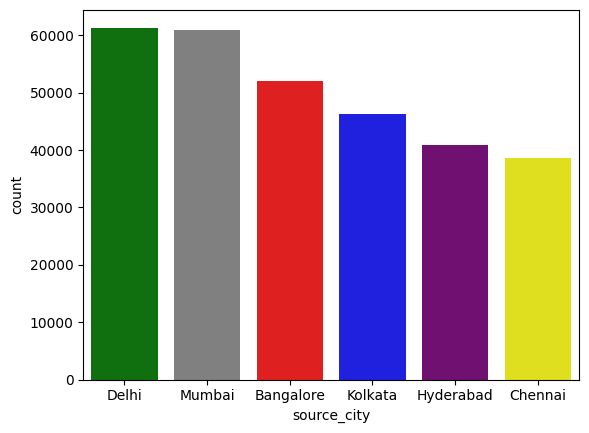

In [725]:
# Get the frequencies of each category in the "source_city" column
freqs2 = df["source_city"].value_counts()

# Get the category names in descending order of their frequency
order = freqs2.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["source_city"], order=order, palette=cols)
print(freqs2)

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


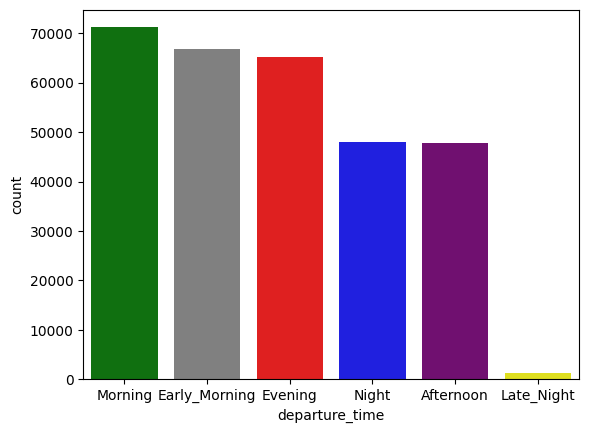

In [726]:
# Get the frequencies of each category in the "departure_time" column
freqs3 = df["departure_time"].value_counts()

# Get the category names in descending order of their frequency
order = freqs3.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["departure_time"], order=order, palette=cols)
print(freqs3)

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64


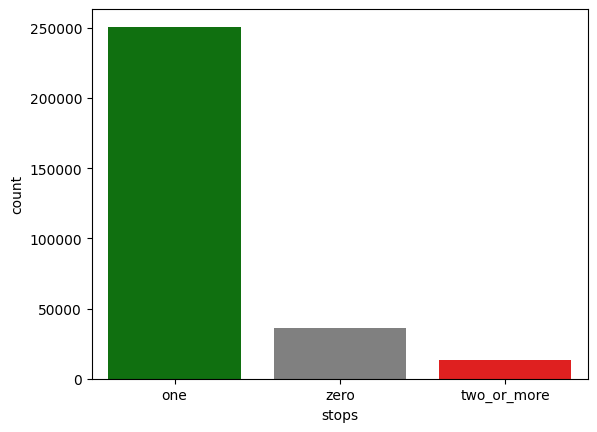

In [727]:
# Get the frequencies of each category in the "stops" column
freqs4 = df["stops"].value_counts()

# Get the category names in descending order of their frequency
order = freqs4.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["stops"], order=order, palette=cols)
print(freqs4)

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64


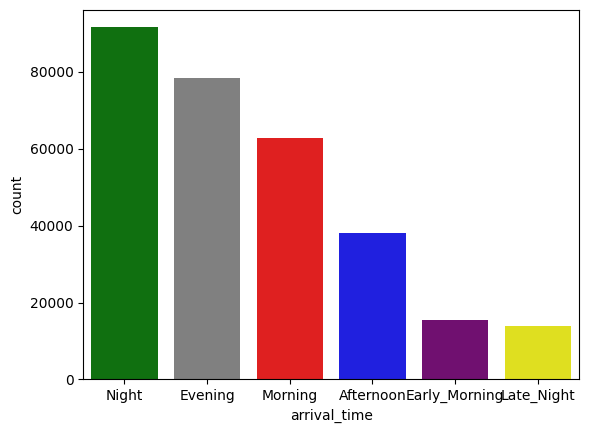

In [728]:
# Get the frequencies of each category in the "arrival_time" column
freq9 = df["arrival_time"].value_counts()

# Get the category names in descending order of their freq9uency
order = freq9.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["arrival_time"], order=order, palette=cols)
print(freq9)

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


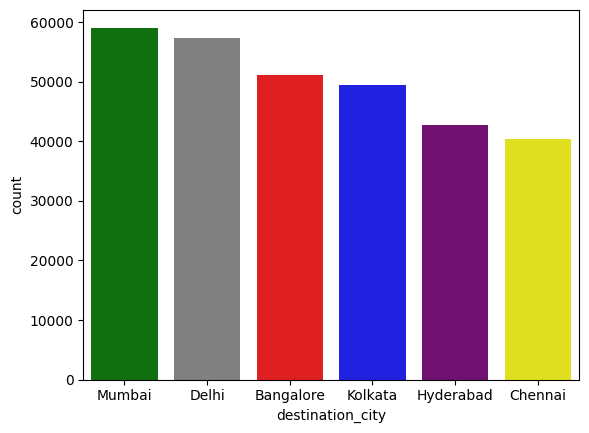

In [729]:
# Get the frequencies of each category in the "destination_city" column
freqs5 = df["destination_city"].value_counts()

# Get the category names in descending order of their frequency
order = freqs5.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["destination_city"], order=order, palette=cols)
print(freqs5)

Economy     206666
Business     93487
Name: class, dtype: int64


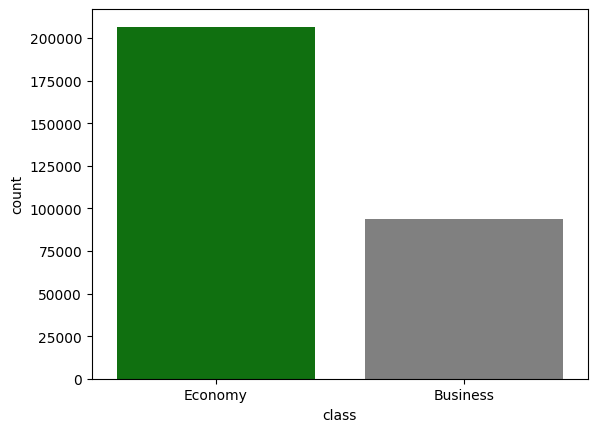

In [730]:
# Get the frequencies of each category in the "class" column
freqs6 = df["class"].value_counts()

# Get the category names in descending order of their frequency
order = freqs6.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
ax = sns.countplot(x=df["class"], order=order, palette=cols)
print(freqs6)

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64


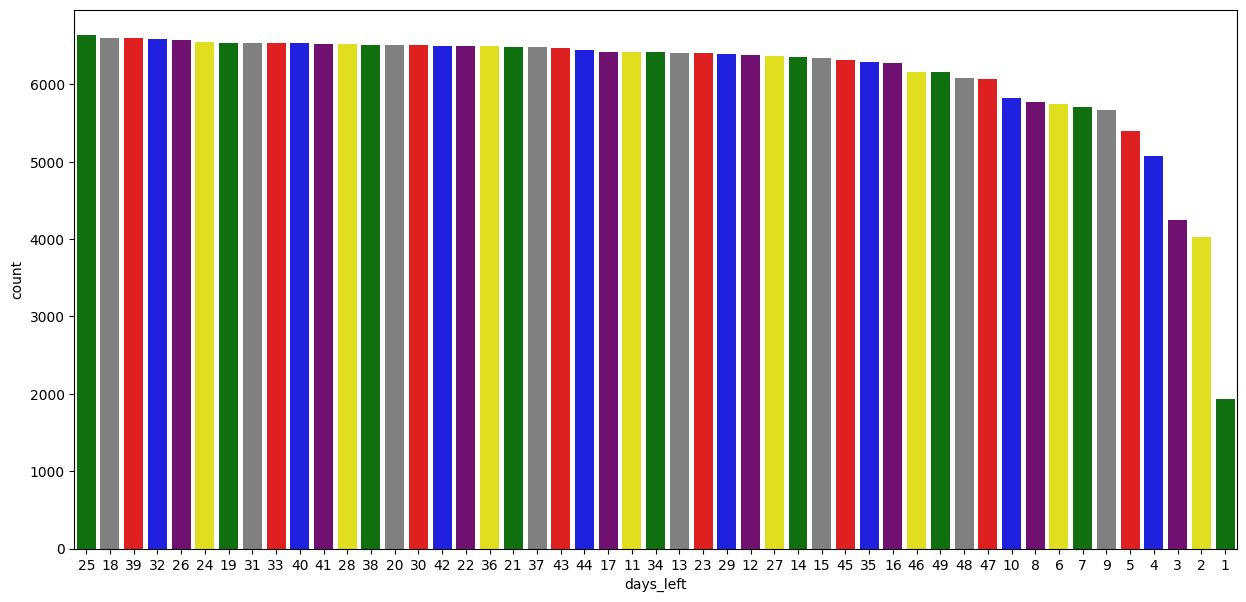

In [731]:
# Get the frequencies of each category in the "days_left" column
freqs7 = df["days_left"].value_counts()

# Get the category names in descending order of their frequency
order = freqs7.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df["days_left"], order=order, palette=cols)
print(freqs7)

<Axes: xlabel='days_left'>

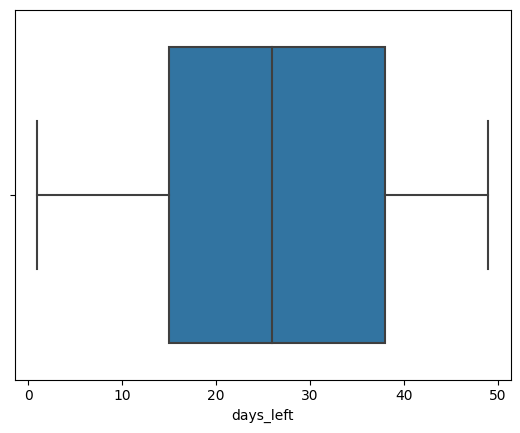

In [732]:
## boxplot for the time till the flight
sns.boxplot(x=df["days_left"])

<Axes: xlabel='duration'>

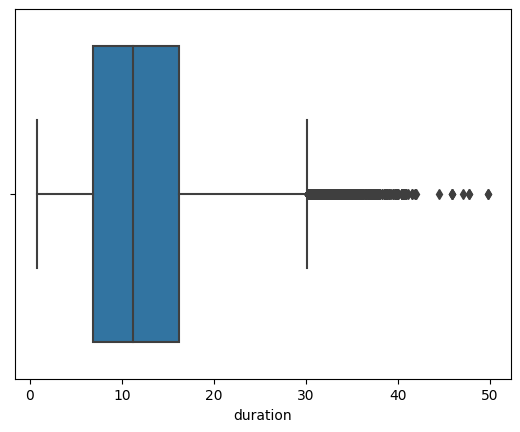

In [733]:
## boxplot for the duration for the journey, point A to B
sns.boxplot(x=df["duration"])

<Axes: xlabel='price'>

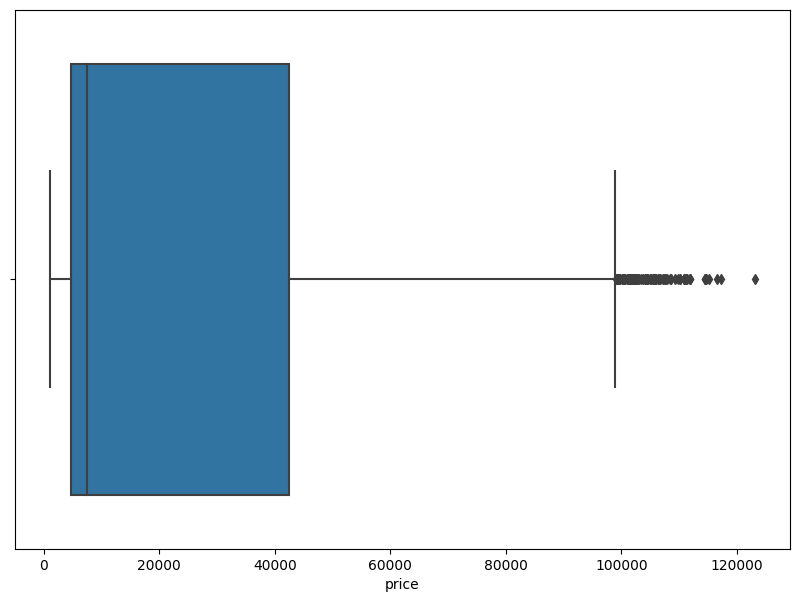

In [734]:
## boxplot for the price paid for th flights
plt.figure(figsize=(10, 7))
sns.boxplot(x=df["price"])

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64


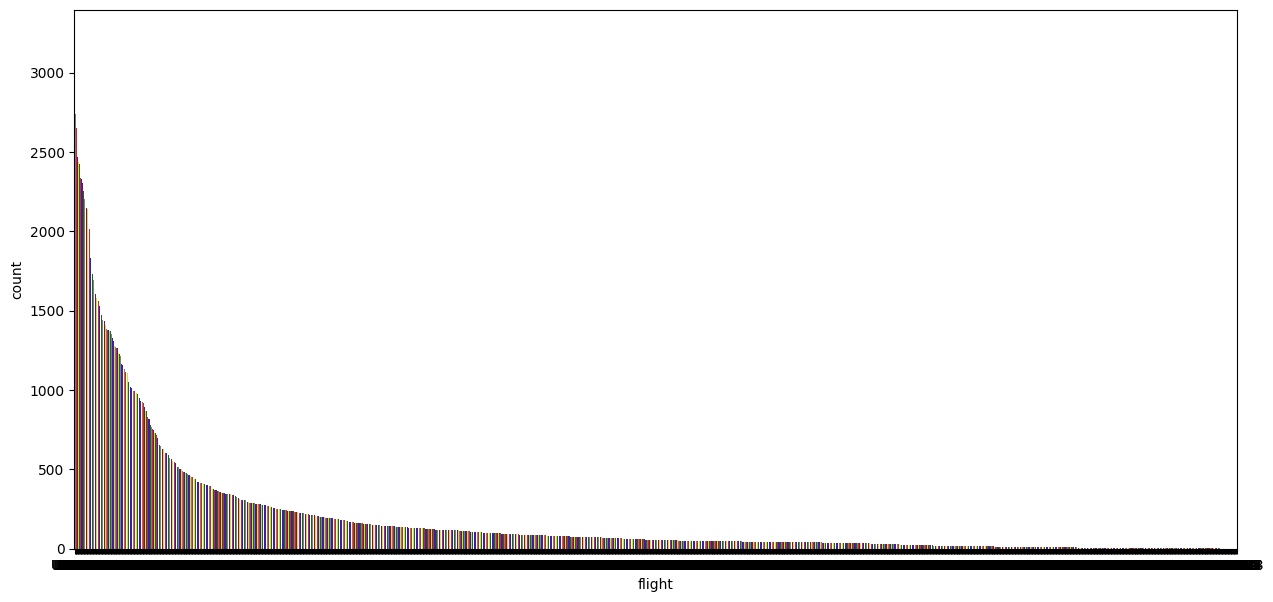

In [735]:
# Get the frequencies of each category in the "flight" column
freqs8 = df["flight"].value_counts()

# Get the category names in descending order of their frequency
order = freqs8.index.tolist()

# Set the palette colors
cols = ["green","grey","red","blue","purple","yellow"]

# Plot the countplot with the categories sorted in descending order
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df["flight"], order=order, palette=cols)
print(freqs8)

In [736]:
df.drop(['flight'], axis=1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [737]:
df_bk = df.copy()

In [738]:
import pickle
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Save the label encoders dictionary to a pickle file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [739]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [740]:
df.drop(['flight'], axis=1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [741]:
corr_matrix = df.corr()
corr_matrix

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637923,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637923,1.000000,-0.009712,0.071296,-0.118490,0.067001,-0.036485,-0.259530,0.205504,-0.000648,0.305888
source_city,-0.028350,-0.009712,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071296,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118490,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067001,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036485,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259530,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205504,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000648,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


<Axes: >

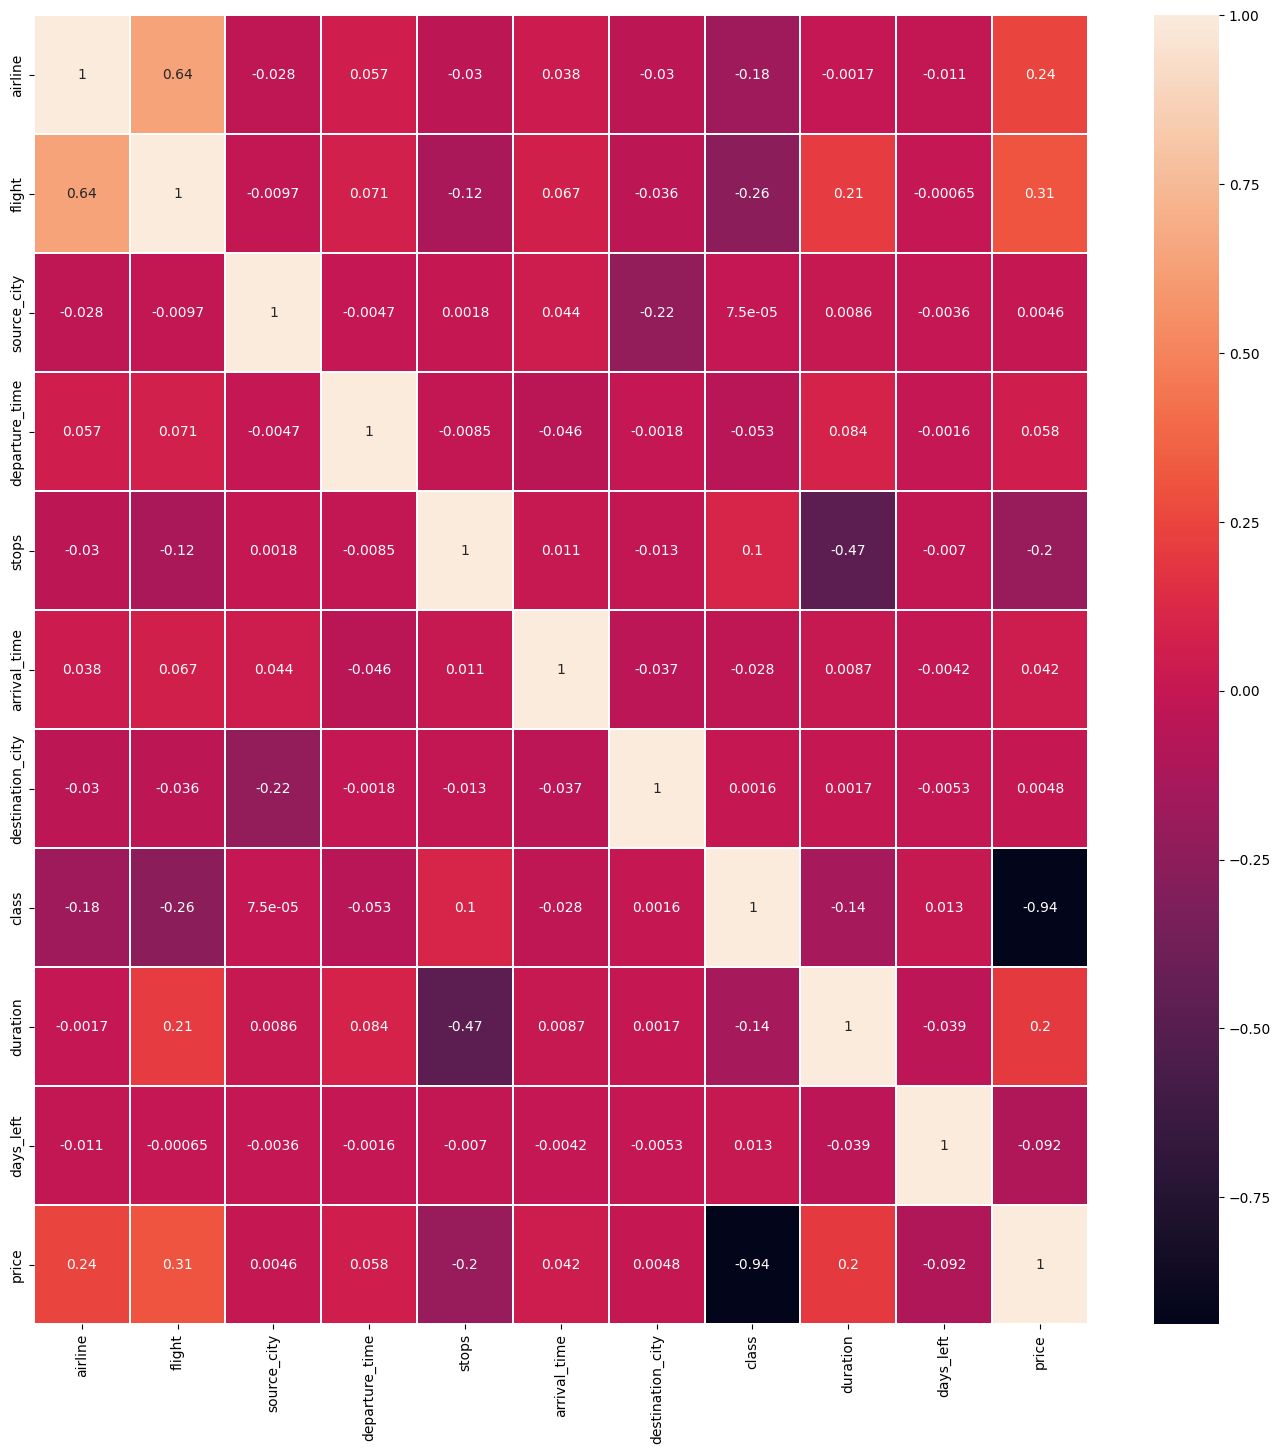

In [742]:
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix,annot=True,linewidths=0.1)

In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


In [744]:
df['airline'] = df['airline'].astype('int8')
df['flight'] = df['flight'].astype('int8')
df['source_city'] = df['source_city'].astype('int8')
df['departure_time'] = df['departure_time'].astype('int8')
df['stops'] = df['stops'].astype('int8')
df['arrival_time'] = df['arrival_time'].astype('int8')
df['destination_city'] = df['destination_city'].astype('int8')
df['class'] = df['class'].astype('int8')
df['duration'] = df['duration'].astype('float16')
df['days_left'] = df['days_left'].astype('int8')
df['price'] = df['price'].astype('float32')

In [745]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int8   
 1   flight            300153 non-null  int8   
 2   source_city       300153 non-null  int8   
 3   departure_time    300153 non-null  int8   
 4   stops             300153 non-null  int8   
 5   arrival_time      300153 non-null  int8   
 6   destination_city  300153 non-null  int8   
 7   class             300153 non-null  int8   
 8   duration          300153 non-null  float16
 9   days_left         300153 non-null  int8   
 10  price             300153 non-null  float32
dtypes: float16(1), float32(1), int8(9)
memory usage: 4.3 MB


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,-128,2,2,2,5,5,1,2.169922,1,5953.0
1,4,107,2,1,2,4,5,1,2.330078,1,5953.0
2,0,-67,2,1,2,1,5,1,2.169922,1,5956.0
3,5,23,2,4,2,0,5,1,2.250000,1,5955.0
4,5,13,2,4,2,4,5,1,2.330078,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,-59,1,4,0,2,3,0,10.078125,49,69265.0
300149,5,-55,1,0,0,5,3,0,10.421875,49,77105.0
300150,5,-50,1,1,0,5,3,0,13.828125,49,79099.0
300151,5,-53,1,1,0,2,3,0,10.000000,49,81585.0


In [746]:
df2= df.drop(['flight'], axis=1)
df2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.169922,1,5953.0
1,4,2,1,2,4,5,1,2.330078,1,5953.0
2,0,2,1,2,1,5,1,2.169922,1,5956.0
3,5,2,4,2,0,5,1,2.250000,1,5955.0
4,5,2,4,2,4,5,1,2.330078,1,5955.0
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.078125,49,69265.0
300149,5,1,0,0,5,3,0,10.421875,49,77105.0
300150,5,1,1,0,5,3,0,13.828125,49,79099.0
300151,5,1,1,0,2,3,0,10.000000,49,81585.0


In [747]:
df2['price'] = df2['price']/100

In [748]:
df2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.169922,1,59.529999
1,4,2,1,2,4,5,1,2.330078,1,59.529999
2,0,2,1,2,1,5,1,2.169922,1,59.560001
3,5,2,4,2,0,5,1,2.250000,1,59.549999
4,5,2,4,2,4,5,1,2.330078,1,59.549999
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.078125,49,692.650024
300149,5,1,0,0,5,3,0,10.421875,49,771.049988
300150,5,1,1,0,5,3,0,13.828125,49,790.989990
300151,5,1,1,0,2,3,0,10.000000,49,815.849976


In [749]:
df2.to_csv('flight2.csv', index=False)

In [750]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int8   
 1   source_city       300153 non-null  int8   
 2   departure_time    300153 non-null  int8   
 3   stops             300153 non-null  int8   
 4   arrival_time      300153 non-null  int8   
 5   destination_city  300153 non-null  int8   
 6   class             300153 non-null  int8   
 7   duration          300153 non-null  float16
 8   days_left         300153 non-null  int8   
 9   price             300153 non-null  float32
dtypes: float16(1), float32(1), int8(8)
memory usage: 4.0 MB


In [751]:
y=df2["price"]
X=df2.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.30, random_state=13)

In [752]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210107, 9), (90046, 9), (210107,), (90046,))

In [753]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)

In [754]:
X_train

array([[1.    , 1.    , 0.4   , ..., 1.    , 0.607 , 0.1042],
       [0.2   , 0.4   , 0.4   , ..., 1.    , 0.2585, 0.1042],
       [0.2   , 0.8   , 0.    , ..., 1.    , 0.3386, 0.583 ],
       ...,
       [0.2   , 0.    , 0.4   , ..., 0.    , 0.3232, 0.2708],
       [1.    , 0.    , 0.8   , ..., 0.    , 0.153 , 0.2291],
       [0.2   , 0.5996, 1.    , ..., 1.    , 0.2416, 0.5205]],
      dtype=float16)

In [758]:
## TRAIN THE LINEAR LASSO REGRESSION
model_LLR = Lasso()
model_LLR.fit(X_train, y_train)

Lasso()

In [760]:
## MAKE PREDICTIONS USING THE LINEAR LASSO REGRESSION MODEL AND MERGE WITH THE ORIGINAL DATA
pred_LLR = model_LLR.predict(X_test)
out1 = pd.DataFrame({'Actual1': y_test, 'Predicted1': pred_LLR})
result =df_bk.merge(out1, left_index=True, right_index=True)
result

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual1,Predicted1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,59.549999,56.570701
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,59.549999,55.236083
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,60.599998,56.568636
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955,59.549999,38.966463
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,59.549999,24.062543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,514.570007,514.470210
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,514.570007,515.490074
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,514.570007,515.160165
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,790.989990,515.391083


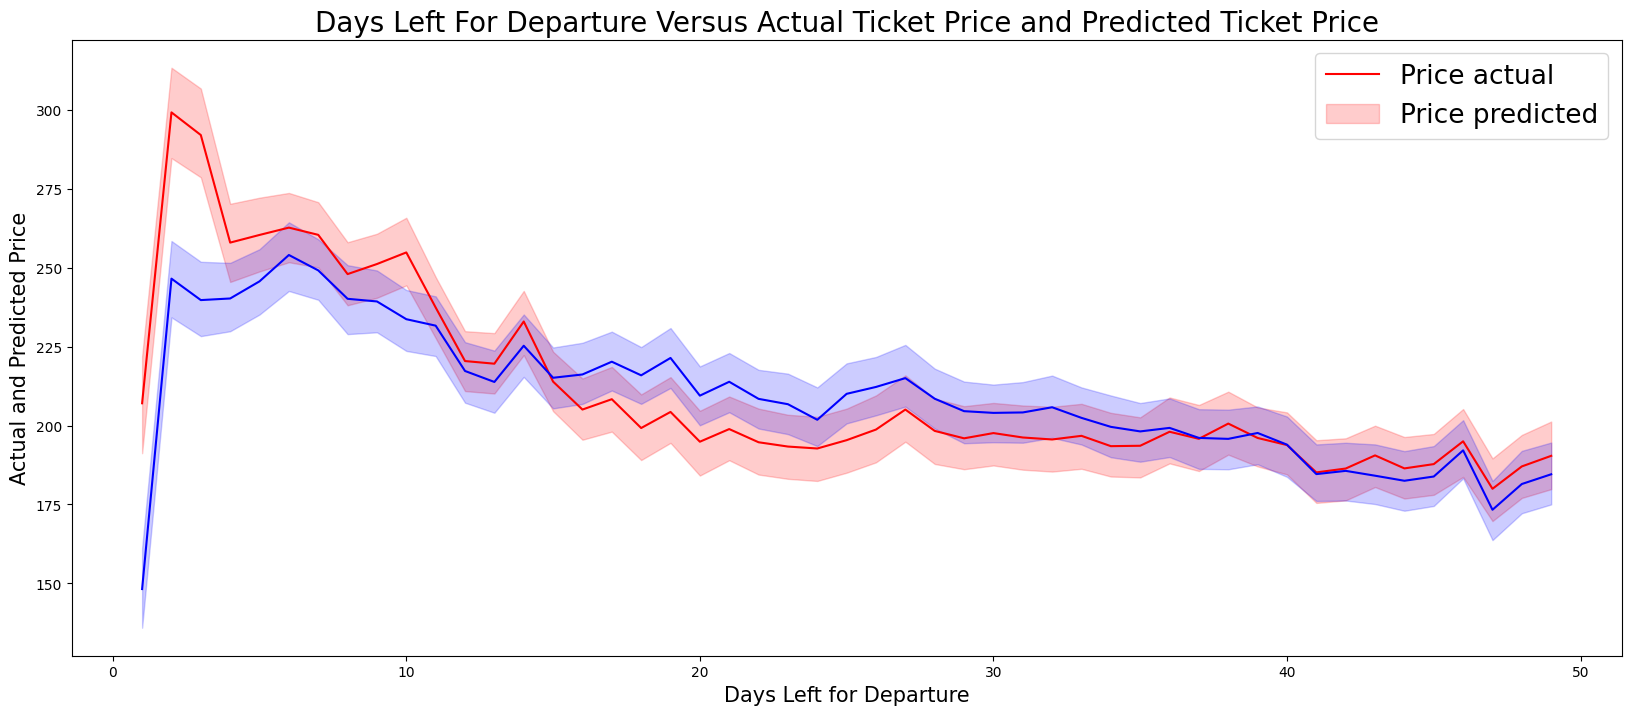

In [761]:
## LINEPLOT OF THE ACTUAL PRICE AND PREDICTED PRICE
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Actual1',color='red')
sns.lineplot(data=result,x='days_left',y='Predicted1',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

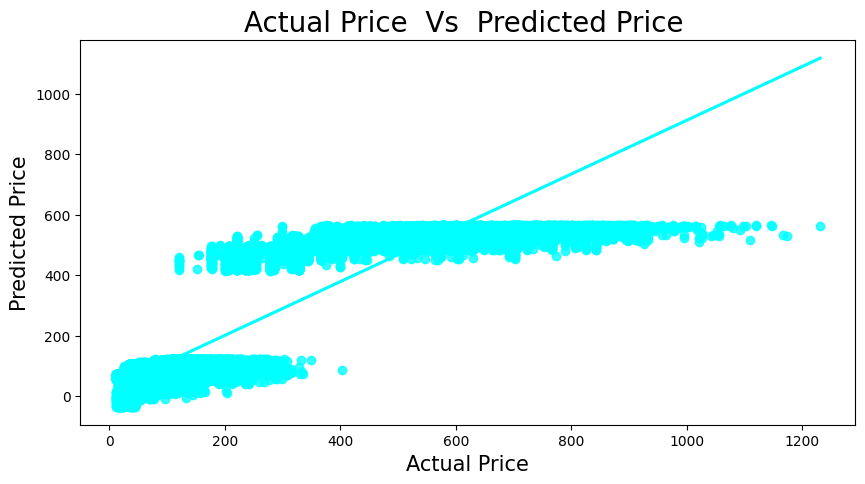

In [762]:
## SCATTERPLOT OF THE ACTUAL PRICE AND PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual1',y='Predicted1',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [763]:
## description of the model and statistics
model_LLR.score(X_test,y_test) # R2 score
model_LLR.coef_ # Coefficients
model_LLR.intercept_ # Intercept
model_LLR.get_params() # Parameters
model_LLR.n_iter_ # Number of iterations
print("the model score / R2: ", model_LLR.score(X_test,y_test))
print("the model coefficients: ", model_LLR.coef_)
print("the model intercept: ", model_LLR.intercept_)
print("the model parameters: ", model_LLR.get_params())
print("the model number of iterations: ", model_LLR.n_iter_)
print("the model: ", model_LLR)

## description of the model and statistics
# mse 
mse = mean_squared_error(y_test, pred_LLR)
print("MSE: %.4f" % mse)
# rmse
rmse = np.sqrt(mean_squared_error(y_test, pred_LLR))
print("RMSE: %.4f" % rmse)
# mae
mae = mean_absolute_error(y_test, pred_LLR)
print("MAE: %.4f" % mae)
# r2
r2 = r2_score(y_test, pred_LLR)
print("R2: %.4f" % r2)

the model score / R2:  0.9029963866016643
the model coefficients:  [ 4.06310639e+01  0.00000000e+00  0.00000000e+00 -6.57058727e+01
  1.66867966e+00  0.00000000e+00 -4.43882313e+02  4.05060075e-01
 -5.12219725e+01]
the model intercept:  524.1808061265516
the model parameters:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
the model number of iterations:  5
the model:  Lasso()
MSE: 5008.6013
RMSE: 70.7715
MAE: 46.0633
R2: 0.9030


In [764]:
## TRAIN THE LINEAR RIDGE REGRESSION
model_LRR2 = Ridge()
model_LRR2.fit(X_train, y_train)

Ridge()

In [765]:
## MAKE THE PREDICTION USING THE LINEAR RIDGE REGRESSION MODEL AND MERGE WITH THE ORIGINAL DATA
pred_LRR2 = model_LRR2.predict(X_test)
out2 = pd.DataFrame({'Actual2': y_test, 'Predicted2': pred_LRR2})
result2 =df_bk.merge(out2, left_index=True, right_index=True)
result2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual2,Predicted2
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,59.549999,60.526130
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,59.549999,52.950155
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,60.599998,60.293031
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955,59.549999,33.728320
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,59.549999,21.294135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,514.570007,520.141077
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,514.570007,528.886447
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,514.570007,526.161979
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,790.989990,516.411746


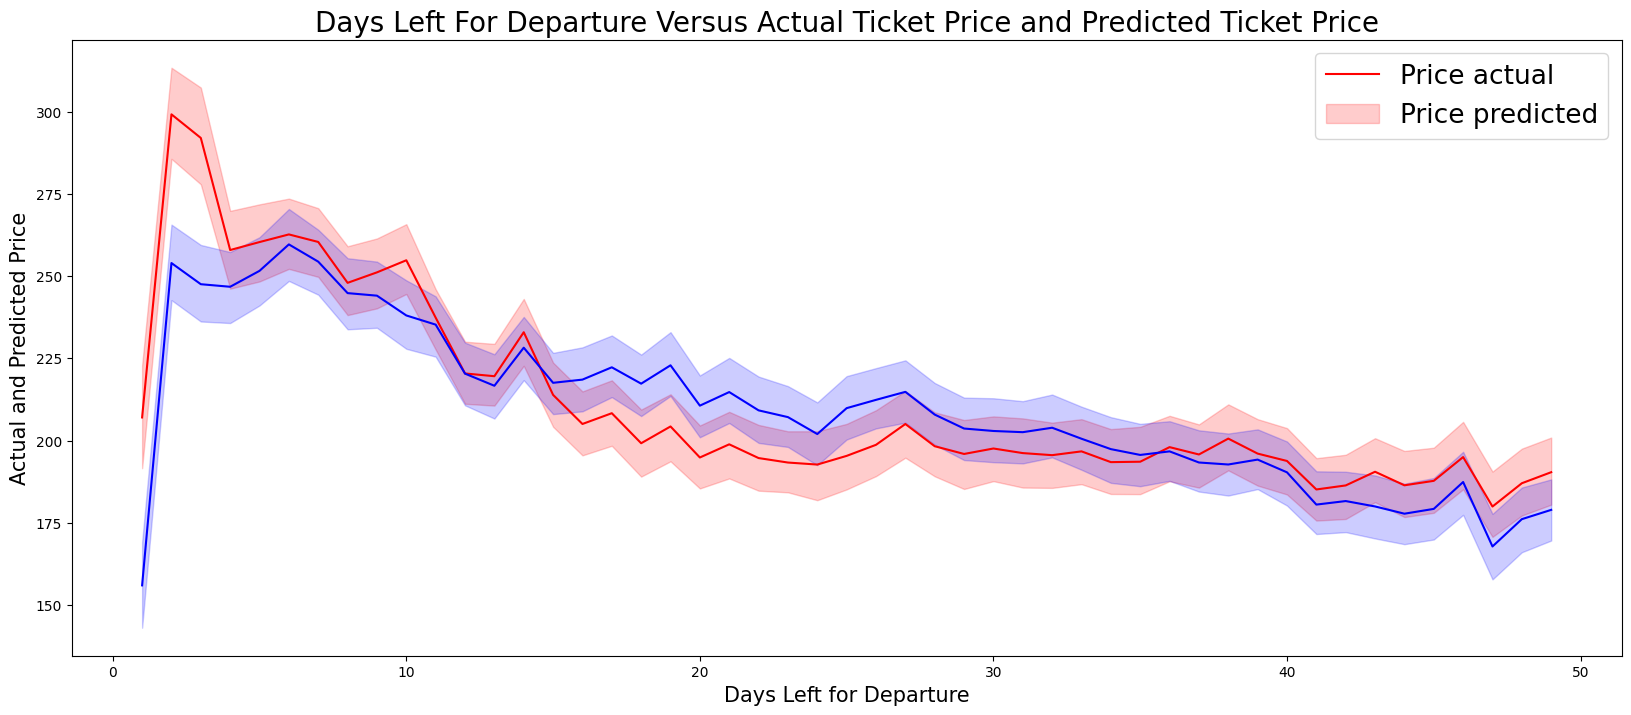

In [766]:
## LINEPLOT OF THE ACTUAL PRICE AND PREDICTED PRICE
plt.figure(figsize=(20,8))
sns.lineplot(data=result2,x='days_left',y='Actual2',color='red')
sns.lineplot(data=result2,x='days_left',y='Predicted2',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

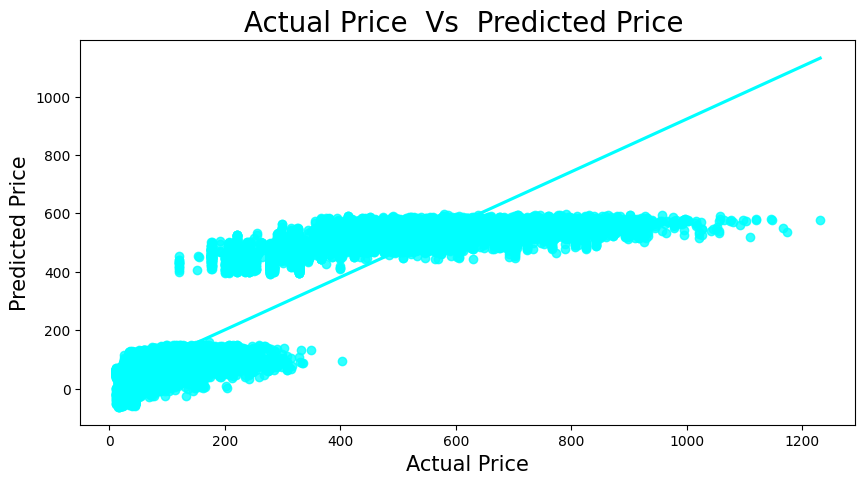

In [767]:
## SCATTERPLOT OF THE ACTUAL PRICE AND PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual2',y='Predicted2',data=result2,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [769]:
## description of the model and statistics
model_LRR2.score(X_test,y_test) # R2 score
model_LRR2.coef_ # Coefficients
model_LRR2.intercept_ # Intercept
model_LRR2.get_params() # Parameters
model_LRR2.n_iter_ # Number of iterations
print("the model score / R2: ", model_LRR2.score(X_test,y_test))
print("the model coefficients: ", model_LRR2.coef_)
print("the model intercept: ", model_LRR2.intercept_)
print("the model parameters: ", model_LRR2.get_params())
print("the model number of iterations: ", model_LRR2.n_iter_)
print("the model: ", model_LRR2)

## description of the model and statistics
# mse 
mse = mean_squared_error(y_test, pred_LRR2)
print("MSE: %.4f" % mse)
# rmse
rmse = np.sqrt(mean_squared_error(y_test, pred_LRR2))
print("RMSE: %.4f" % rmse)
# mae
mae = mean_absolute_error(y_test, pred_LRR2)
print("MAE: %.4f" % mae)
# r2
r2 = r2_score(y_test, pred_LRR2)
print("R2: %.4f" % r2)

the model score / R2:  0.9046635575820781
the model coefficients:  [  47.63469159    4.88357852    1.62133854  -64.8602524     9.47228138
    5.85961186 -445.28149676   45.7375123   -62.62571699]
the model intercept:  504.94790624921893
the model parameters:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
the model number of iterations:  None
the model:  Ridge()
MSE: 4922.5201
RMSE: 70.1607
MAE: 46.3753
R2: 0.9047


In [770]:
## TRAIN THE LINEAR ELASTIC NET REGRESSION
model_LENR = ElasticNet()
model_LENR.fit(X_train, y_train)

ElasticNet()

In [771]:
## MAKE THE PREDICTION USING THE LINEAR ELASTIC NET REGRESSION MODEL AND MERGE WITH THE ORIGINAL DATA
pred_LENR = model_LENR.predict(X_test)
out3 = pd.DataFrame({'Actual3': y_test, 'Predicted3': pred_LENR})
result3 =df_bk.merge(out3, left_index=True, right_index=True)
result3

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual3,Predicted3
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,59.549999,163.257884
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,59.549999,160.453086
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,60.599998,163.213565
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955,59.549999,150.649938
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,59.549999,141.036259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,514.570007,311.042379
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,514.570007,316.206535
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,514.570007,312.043758
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,790.989990,310.531457


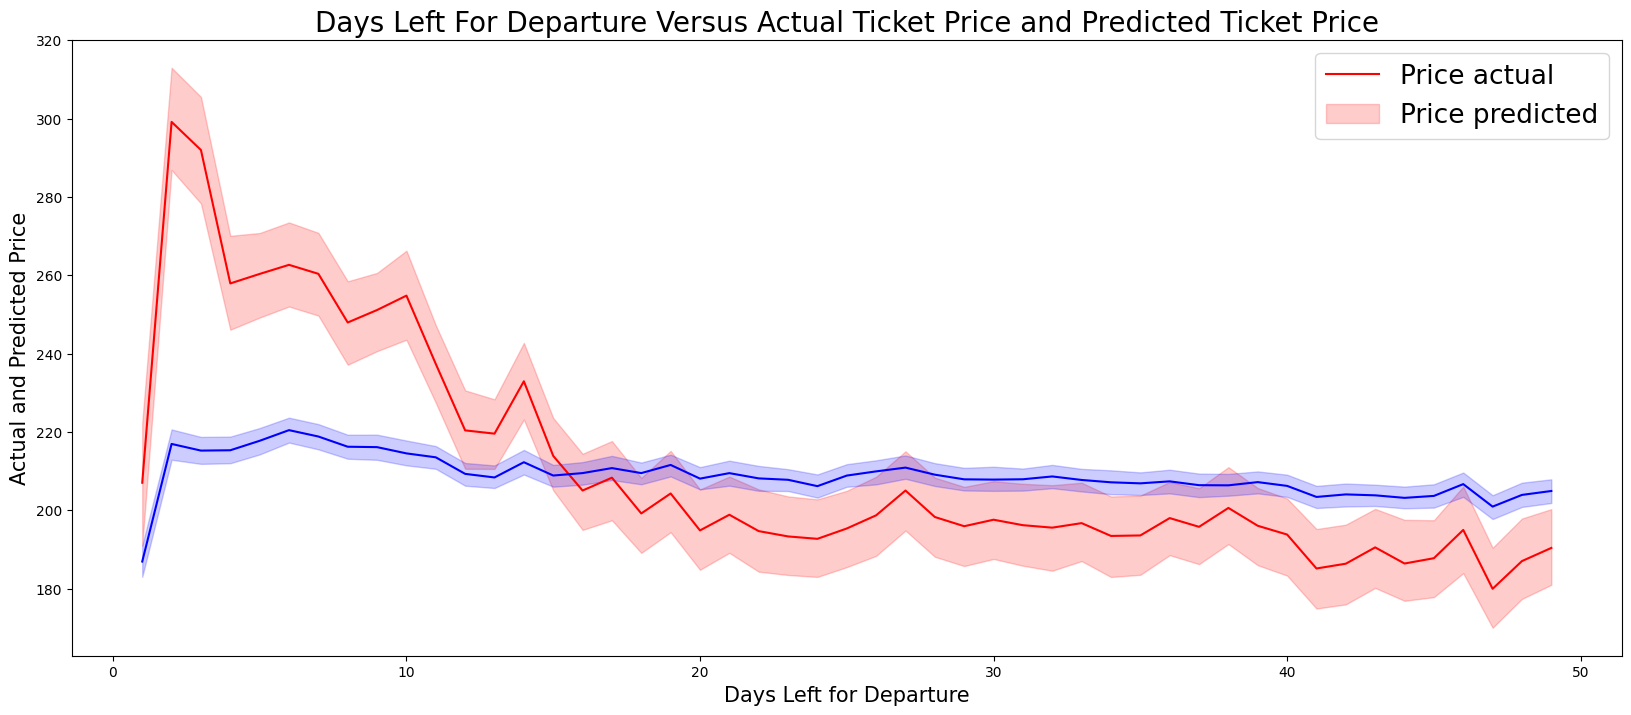

In [772]:
## LINEPLOT OF THE ACTUAL PRICE AND PREDICTED PRICE
plt.figure(figsize=(20,8))
sns.lineplot(data=result3,x='days_left',y='Actual3',color='red')
sns.lineplot(data=result3,x='days_left',y='Predicted3',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

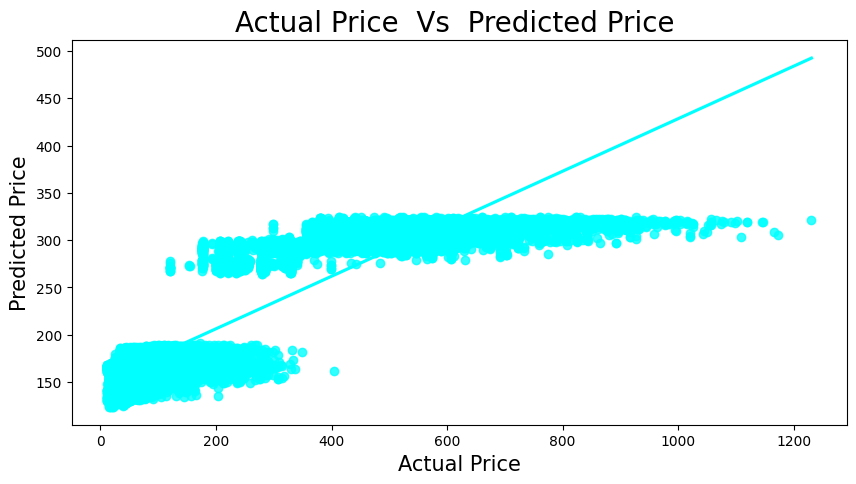

In [773]:
## SCATTER PLOT OF THE ACTUAL PRICE VS THE PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual3',y='Predicted3',data=result3,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [774]:
## description of the model and statistics
model_LENR.score(X_test,y_test) # R2 score
model_LENR.coef_ # Coefficients
model_LENR.intercept_ # Intercept
model_LENR.get_params() # Parameters
model_LENR.n_iter_ # Number of iterations
print("the model score / R2: ", model_LENR.score(X_test,y_test))
print("the model coefficients: ", model_LENR.coef_)
print("the model intercept: ", model_LENR.intercept_)
print("the model parameters: ", model_LENR.get_params())
print("the model number of iterations: ", model_LENR.n_iter_)
print("the model: ", model_LENR)

## description of the model and statistics
# mse 
mse = mean_squared_error(y_test, pred_LENR)
print("MSE: %.4f" % mse)
# rmse
rmse = np.sqrt(mean_squared_error(y_test, pred_LENR))
print("RMSE: %.4f" % rmse)
# mae
mae = mean_absolute_error(y_test, pred_LENR)
print("MAE: %.4f" % mae)
# r2
r2 = r2_score(y_test, pred_LENR)
print("R2: %.4f" % r2)



the model score / R2:  0.46923902734384626
the model coefficients:  [ 2.44130403e+01  0.00000000e+00  4.43709146e+00 -2.04107068e+01
  3.50685365e+00  4.91244570e-02 -1.35526639e+02  8.69607389e+00
 -8.73041007e+00]
the model intercept:  288.1132816453543
the model parameters:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
the model number of iterations:  4
the model:  ElasticNet()
MSE: 27404.8566
RMSE: 165.5441
MAE: 139.4125
R2: 0.4692


In [775]:
## TRAIN THE EXTRA TREE REGRESSOR
from sklearn.ensemble import ExtraTreesRegressor
model_ETR = ExtraTreesRegressor()
model_ETR.fit(X_train, y_train)

ExtraTreesRegressor()

In [776]:
## MAKE THE PREDICTION USING THE EXTRA TREE REGRESSOR MODEL AND MERGE WITH THE ORIGINAL DATA
pred_ETR = model_ETR.predict(X_test)
out4 = pd.DataFrame({'Actual4': y_test, 'Predicted4': pred_ETR})
result4 =df_bk.merge(out4, left_index=True, right_index=True)
result4

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual4,Predicted4
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,59.549999,78.180899
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,59.549999,64.694900
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,60.599998,85.844299
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955,59.549999,79.937000
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,59.549999,65.974800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,514.570007,607.648406
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,514.570007,514.570007
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,514.570007,511.452108
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,790.989990,727.369794


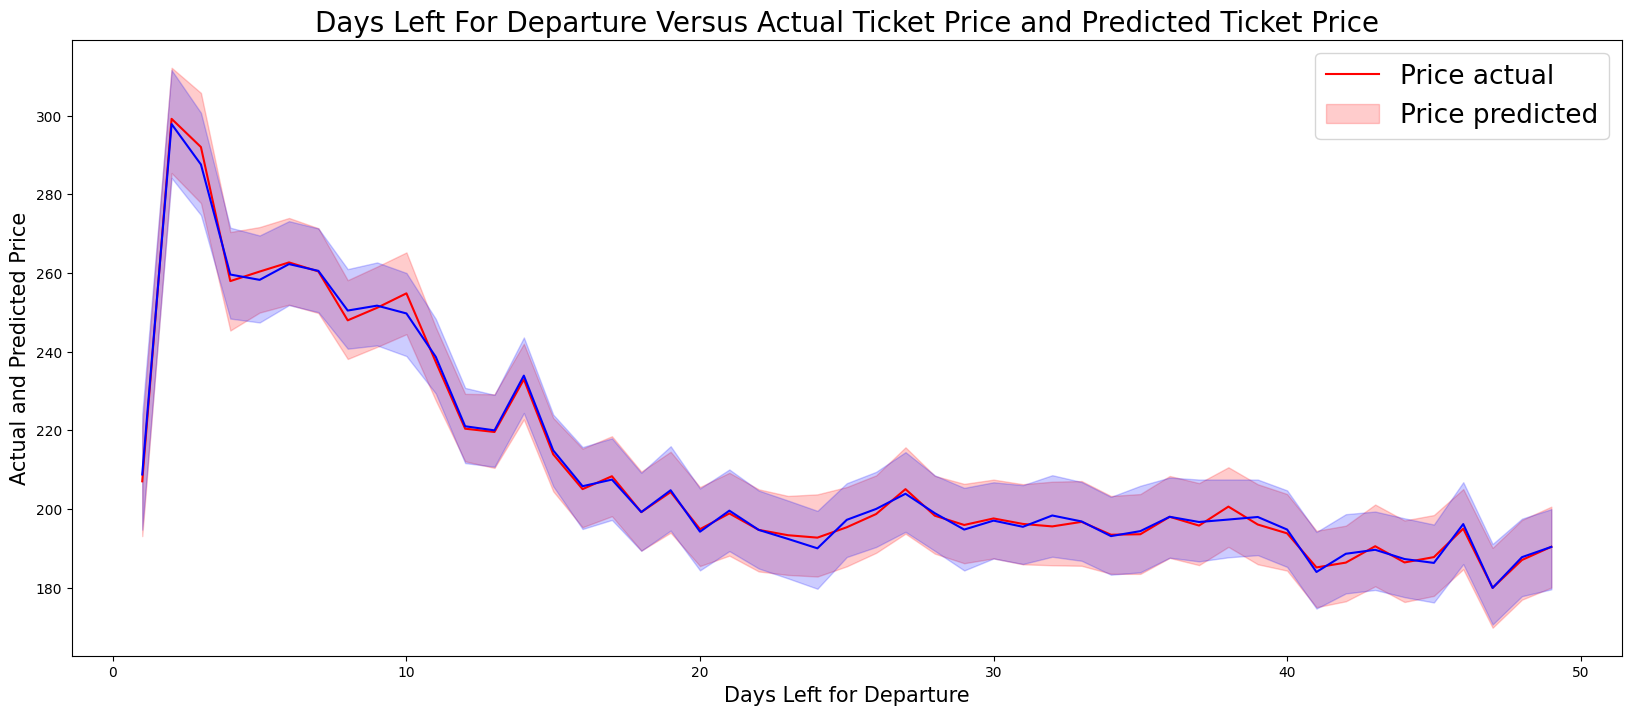

In [777]:
## LINE PLOT OF DAYS LEFT FOR DEPARTURE VERSUS ACTUAL AND PREDICTED PRICE
plt.figure(figsize=(20,8))
sns.lineplot(data=result4,x='days_left',y='Actual4',color='red')
sns.lineplot(data=result4,x='days_left',y='Predicted4',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

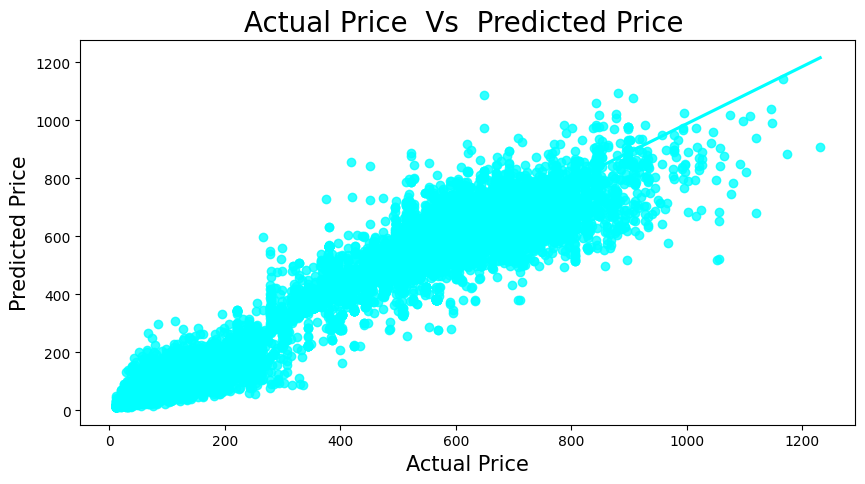

In [778]:
## SCATTER PLOT OF ACTUAL PRICE VERSUS PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual4',y='Predicted4',data=result4,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [792]:
## description of the model and statistics
model_ETR.score(X_test,y_test) # R2 score
model_ETR.feature_importances_ # Coefficients
model_ETR.get_params() # Parameters
print("the model score / R2: ", model_ETR.score(X_test,y_test))
print("the model coefficients: ", model_ETR.feature_importances_)
print("the model parameters: ", model_ETR.get_params())
print("the model: ", model_ETR)
print("the r2 score: ", r2_score(y_test, pred_ETR))
print("the mse: ", mean_squared_error(y_test, pred_ETR))
print("the rmse: ", np.sqrt(mean_squared_error(y_test, pred_ETR)))
print("the mae: ", mean_absolute_error(y_test, pred_ETR))


the model score / R2:  0.9831548373000273
the model coefficients:  [0.01112805 0.01020228 0.00518227 0.03626234 0.00555519 0.01033949
 0.88032448 0.02236085 0.01864505]
the model parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
the model:  ExtraTreesRegressor()
the r2 score:  0.9831548373000273
the mse:  869.768676962014
the rmse:  29.491840854073757
the mae:  11.707873813813315


In [780]:
## TRAIN THE RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [781]:
## MAKE THE PREDICTION USING THE RANDOM FOREST REGRESSOR MODEL AND MERGE WITH THE ORIGINAL DATA
pred_RFR = model_RFR.predict(X_test)
out5 = pd.DataFrame({'Actual5': y_test, 'Predicted5': pred_RFR})
result5 =df_bk.merge(out5, left_index=True, right_index=True)
result5

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual5,Predicted5
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,59.549999,76.991849
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,59.549999,72.678200
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,60.599998,86.496349
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955,59.549999,81.400999
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,59.549999,68.649900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,514.570007,622.838206
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,514.570007,516.198807
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,514.570007,511.169307
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,790.989990,805.449196


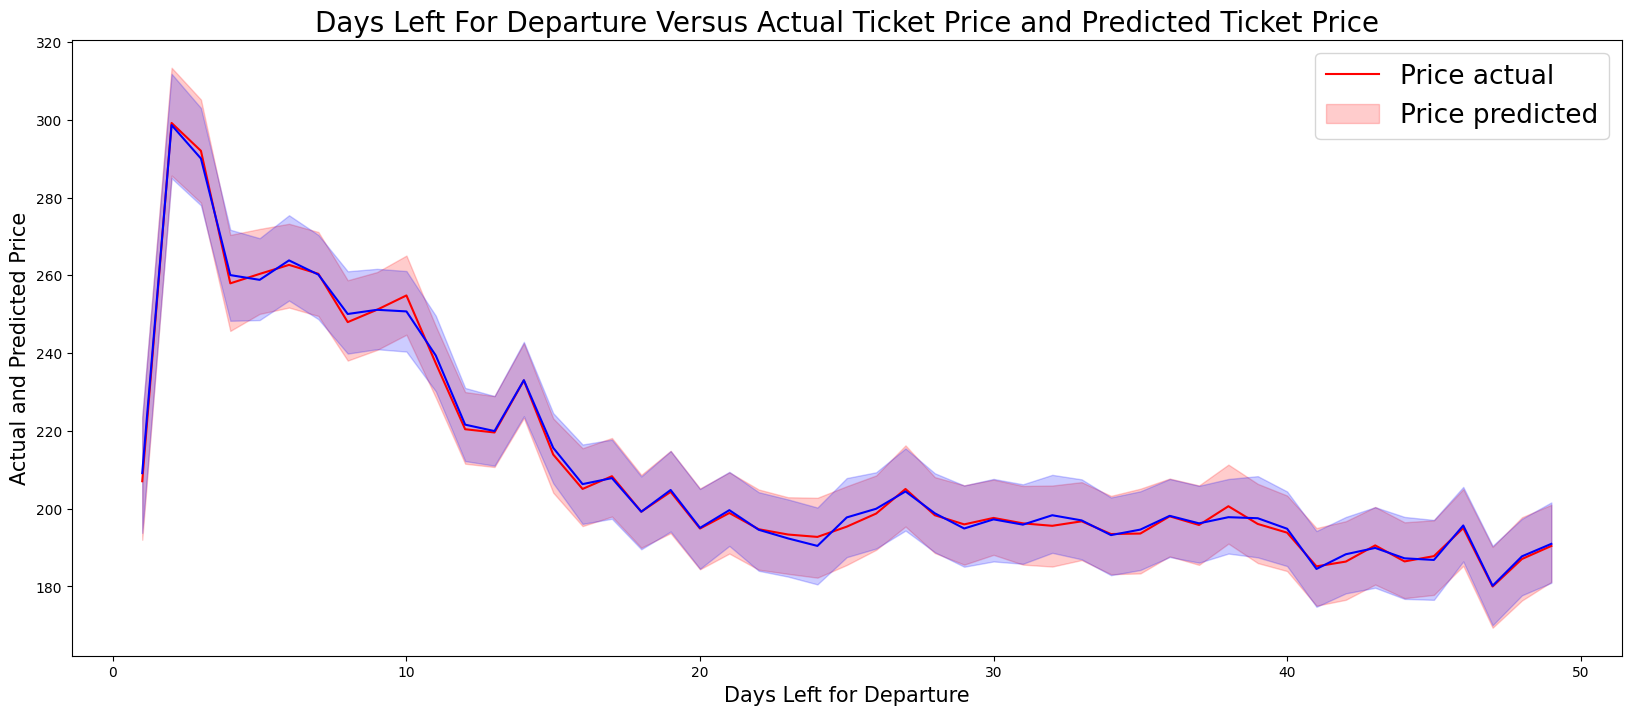

In [782]:
## LINE PLOT OF DAYS LEFT FOR DEPARTURE VERSUS ACTUAL AND PREDICTED PRICE
plt.figure(figsize=(20,8))
sns.lineplot(data=result5,x='days_left',y='Actual5',color='red')
sns.lineplot(data=result5,x='days_left',y='Predicted5',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

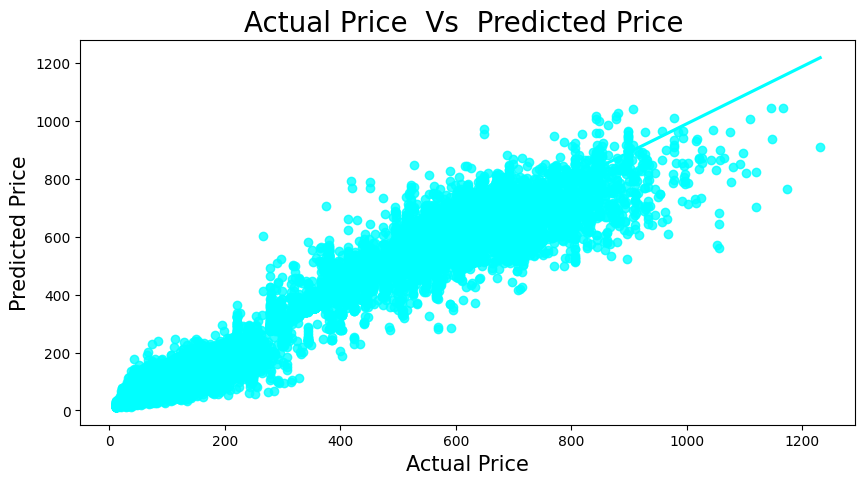

In [783]:
## SCATTER PLOT OF ACTUAL PRICE VERSUS PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual5',y='Predicted5',data=result5,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [790]:
## description of the model and statistics
model_RFR.score(X_test,y_test) # R2 score
model_RFR.feature_importances_ # Coefficients
model_RFR.get_params() # Parameters
print("the model score / R2: ", model_RFR.score(X_test,y_test))
print("the model coefficients: ", model_RFR.feature_importances_)
print("the model parameters: ", model_RFR.get_params())
print("the model: ", model_RFR)

the model score / R2:  0.98519450000829
the model coefficients:  [0.01082389 0.01060947 0.00433377 0.00190806 0.00453972 0.00967398
 0.88006404 0.05924241 0.01880466]
the model parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
the model:  RandomForestRegressor()


In [822]:
## Neural Network
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
 restore_best_weights=True)

## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 32, kernel_initializer= 'uniform', activation = 'relu', input_dim = 9))
## hidden layer
model.add(Dense(units= 16, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.12))
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'linear'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics = ['mse'])


In [826]:
## train the model
history = model.fit(X_train, y_train, batch_size = 295, epochs = 150, callbacks=[early_stopping], validation_split=0.3)

Epoch 1/150
499/499 [==============================] - 1s 2ms/step - loss: 7862.8896 - mse: 7862.8896 - val_loss: 3849.6975 - val_mse: 3849.6975
Epoch 2/150
499/499 [==============================] - 1s 2ms/step - loss: 7881.3340 - mse: 7881.3340 - val_loss: 3939.2871 - val_mse: 3939.2871
Epoch 3/150
499/499 [==============================] - 1s 2ms/step - loss: 7686.6475 - mse: 7686.6475 - val_loss: 3754.7124 - val_mse: 3754.7124
Epoch 4/150
499/499 [==============================] - 1s 2ms/step - loss: 7786.9819 - mse: 7786.9819 - val_loss: 3724.6941 - val_mse: 3724.6941
Epoch 5/150
499/499 [==============================] - 1s 2ms/step - loss: 7636.3174 - mse: 7636.3174 - val_loss: 3887.5554 - val_mse: 3887.5554
Epoch 6/150
499/499 [==============================] - 1s 2ms/step - loss: 7621.3740 - mse: 7621.3740 - val_loss: 3760.3032 - val_mse: 3760.3032
Epoch 7/150
499/499 [==============================] - 1s 2ms/step - loss: 7466.0967 - mse: 7466.0967 - val_loss: 3767.7971 - val_

In [827]:
# Evaluate the model on the test set
loss, mse = model.evaluate(X_test, y_test)
print('Test Loss: %f' % loss)
print('Test MSE: %f' % mse)

2814/2814 [==============================] - 3s 1ms/step - loss: 3499.6089 - mse: 3499.6089
Test Loss: 3499.608887
Test MSE: 3499.608887


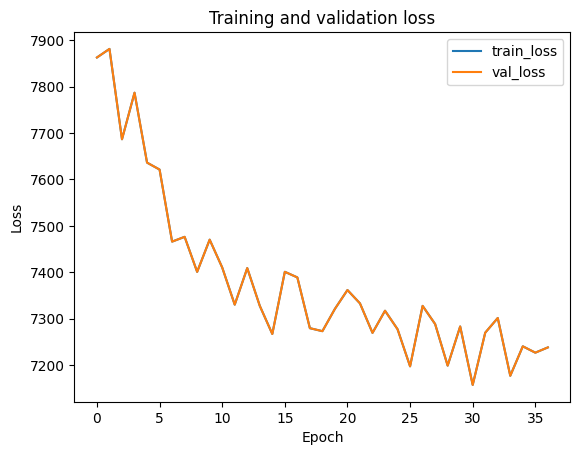

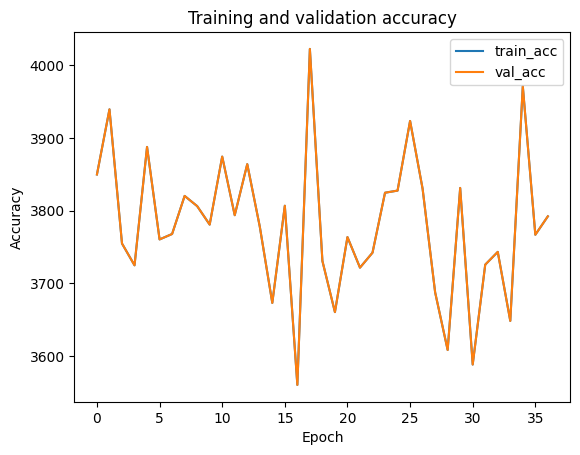

In [828]:
# Train/validation loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['mse'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train/validation accuracy curve
plt.plot(history.history['val_loss'], label='train_acc')
plt.plot(history.history['val_mse'], label='val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [829]:
## make prediction
y_pred_ann = model.predict(X_test)

2814/2814 [==============================] - 3s 973us/step


In [830]:
print(y_test.shape)
print(y_pred_ann.shape)

(90046,)
(90046, 1)


In [831]:
y_pred_ann = y_pred_ann.flatten()

In [832]:
print(y_test.shape)
print(y_pred_ann.shape)

(90046,)
(90046,)


In [833]:
## MAKE THE PREDICTION AND MERGE WITH THE ORIGINAL DATA
out5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})
result5 =df_bk.merge(out5, left_index=True, right_index=True)
result5

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual,Predicted
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,59.549999,119.945625
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,59.549999,122.990837
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,60.599998,119.772148
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955,59.549999,112.356773
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,59.549999,109.381920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,514.570007,549.892090
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,514.570007,575.157959
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,514.570007,563.193726
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,790.989990,571.468506


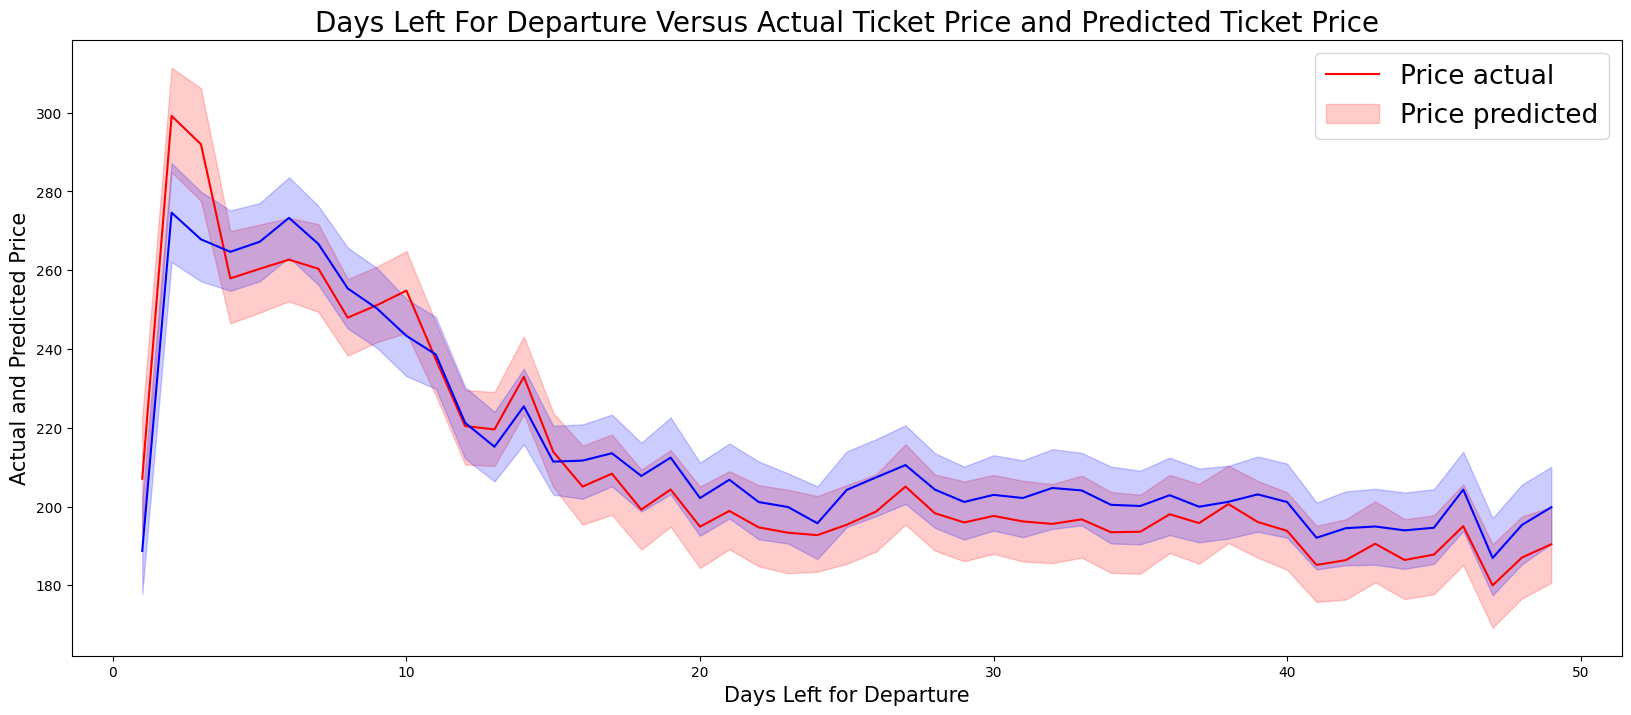

In [834]:
## LINE PLOT OF DAYS LEFT FOR DEPARTURE VERSUS ACTUAL AND PREDICTED PRICE
plt.figure(figsize=(20,8))
sns.lineplot(data=result5,x='days_left',y='Actual',color='red')
sns.lineplot(data=result5,x='days_left',y='Predicted',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

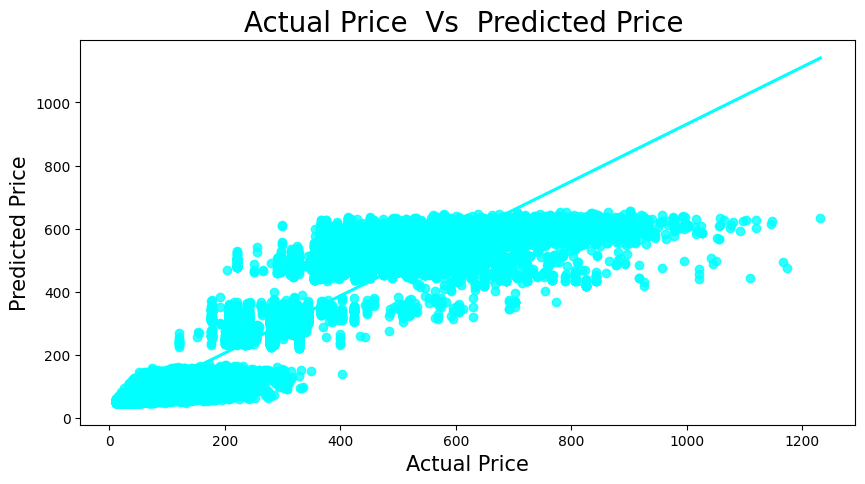

In [835]:
## SCATTER PLOT OF ACTUAL PRICE VERSUS PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual',y='Predicted',data=result5,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [836]:
## description of the model and statistics  (R2 score, Coefficients, Parameters)
# mse 
mse = mean_squared_error(y_test, y_pred_ann)
print("MSE: %.4f" % mse)
# rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print("RMSE: %.4f" % rmse)
# mae
mae = mean_absolute_error(y_test, y_pred_ann)
print("MAE: %.4f" % mae)
# r2
r2 = r2_score(y_test, y_pred_ann)
print("R2: %.4f" % r2)

MSE: 3499.6045
RMSE: 59.1575
MAE: 37.1481
R2: 0.9322


In [837]:
## save the model
model.save('flight_model')

2023-03-30 06:39:47.593 WARNING absl: Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.
2023-03-30 06:39:48.295 INFO    tensorflow: Assets written to: flight_model\assets


In [839]:
## save the ANN model
import pickle
#save the model as a file
with open ('linear_regression_model.pkl','wb') as file:
    pickle.dump(y_pred_ann,file)